In [1]:
# data science
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# API
import requests
import json

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func

In [2]:
df = pd.read_csv('AQI_clean.csv')
df.head()

,country,city,aqi_value,aqi_category,co_aqi_value,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2_5_aqi_value,pm2_5_aqi_category,latitude,longitude
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


In [3]:
engine = create_engine("sqlite:///aqi.sqlite")

In [4]:
query = """CREATE TABLE "aqi" (
	"id" integer Primary key,
	"country" varchar(100),
	"city" varchar(100),
	"aqi_value" integer,
	"aqi_category" varchar(30),
	"co_aqi_value" integer,
	"co_aqi_category" varchar(30),
	"ozone_aqi_value" integer,
	"ozone_aqi_category" varchar(30),
	"no2_aqi_value" integer,
	"no2_aqi_category" varchar(30),
	"pm2_5_aqi_value" integer,
	"pm2_5_aqi_category" varchar(30),
	"latitude" float,
	"longitude" float
);"""

with engine.connect() as conn:
    conn.execute(text(query))

OperationalError: (sqlite3.OperationalError) table "aqi" already exists
[SQL: CREATE TABLE "aqi" (
	"id" integer Primary key,
	"country" varchar(100),
	"city" varchar(100),
	"aqi_value" integer,
	"aqi_category" varchar(30),
	"co_aqi_value" integer,
	"co_aqi_category" varchar(30),
	"ozone_aqi_value" integer,
	"ozone_aqi_category" varchar(30),
	"no2_aqi_value" integer,
	"no2_aqi_category" varchar(30),
	"pm2_5_aqi_value" integer,
	"pm2_5_aqi_category" varchar(30),
	"latitude" float,
	"longitude" float
);]
(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [6]:
df.to_sql("aqi", con=engine, index=False, method="multi", if_exists="append")

16393

In [7]:
 # INSPECT to confirm existence

# Create the inspector and connect it to the engine
inspector_gadget = inspect(engine)

# Collect the names of tables within the database
tables = inspector_gadget.get_table_names()

# print metadata for each table
for table in tables:
    print(table)
    print("-----------")
    
    # get columns
    columns = inspector_gadget.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print() 

aqi
-----------
id INTEGER
country VARCHAR(100)
city VARCHAR(100)
aqi_value INTEGER
aqi_category VARCHAR(30)
co_aqi_value INTEGER
co_aqi_category VARCHAR(30)
ozone_aqi_value INTEGER
ozone_aqi_category VARCHAR(30)
no2_aqi_value INTEGER
no2_aqi_category VARCHAR(30)
pm2_5_aqi_value INTEGER
pm2_5_aqi_category VARCHAR(30)
latitude FLOAT
longitude FLOAT



In [33]:
base_query = """
    SELECT 
        aqi_category, 
        COUNT(*) as count
    FROM
        aqi
"""

# Determine the WHERE clause based on user input
if user_input != 'All':
    where_clause = f"WHERE country = '{user_input}'"
    group_by_clause = "GROUP BY aqi_category"
    query = f"{base_query} {where_clause} {group_by_clause}"
else:
    group_by_clause = "GROUP BY aqi_category"
    query = f"{base_query} {group_by_clause}"

# Execute the query
df = pd.read_sql(query, engine)

# Display the result
df.head()

,aqi_category,count
0,Good,22539
1,Hazardous,186
2,Moderate,20892
3,Unhealthy,2592
4,Unhealthy for Sensitive Groups,2577


In [35]:
user_input = 'All'  # Change this value to the specific country name or 'All'

# Determine the WHERE clause based on user input
if user_input == 'All':
    where_clause = ""  # No filtering, select all rows
else:
    where_clause = f"WHERE country = '{user_input}'"

# Construct the query
query = f"""
    SELECT 
        aqi_category, 
        COUNT(*) as count
    FROM
        aqi
    {where_clause}
    GROUP BY 
         aqi_category
"""

# Execute the query
df = pd.read_sql(query, engine)

# Display the result
df.head()

,aqi_category,count
0,Good,22539
1,Hazardous,186
2,Moderate,20892
3,Unhealthy,2592
4,Unhealthy for Sensitive Groups,2577


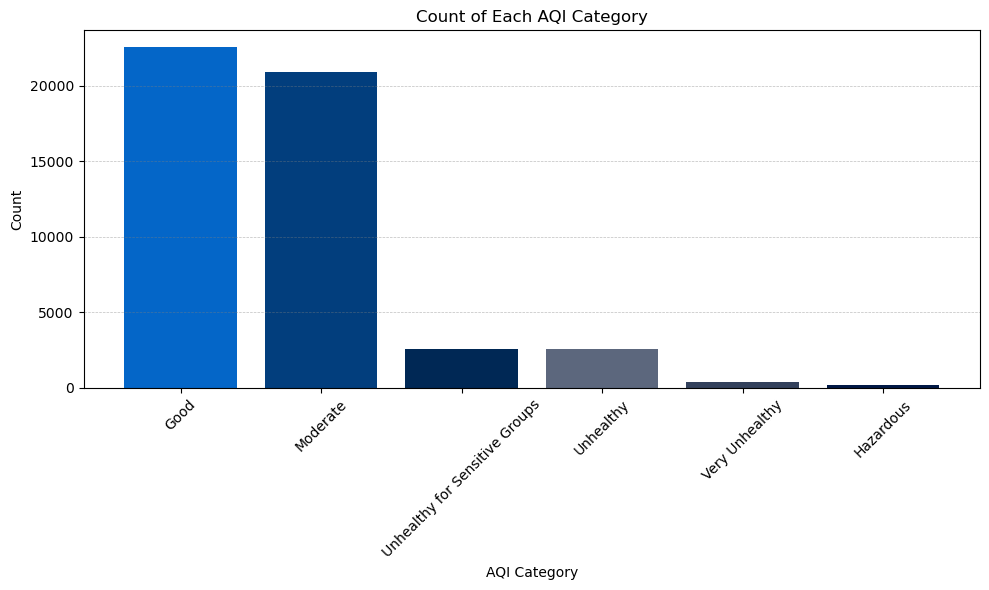

In [20]:
query = """
SELECT aqi_category, COUNT(*) as count
FROM aqi
GROUP BY aqi_category
"""
df = pd.read_sql(query, engine)

# Sorting data by total counts (desc)
custom_order = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 
                'Unhealthy', 'Very Unhealthy', 'Hazardous']

# Create a categorical type with the custom order and assign it to the 'aqi_category' column
df['aqi_category'] = pd.Categorical(df['aqi_category'], categories=custom_order, ordered=True)

# Sort the DataFrame by the custom order
df = df.sort_values('aqi_category')



# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(df['aqi_category'], df['count'], color=['#0466C8', '#023E7D', '#002855', '#5C677D', '#33415C', '#001845'])
plt.xlabel('AQI Category')
plt.ylabel('Count')
plt.title('Count of Each AQI Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='--', linewidth=0.5)
plt.show()

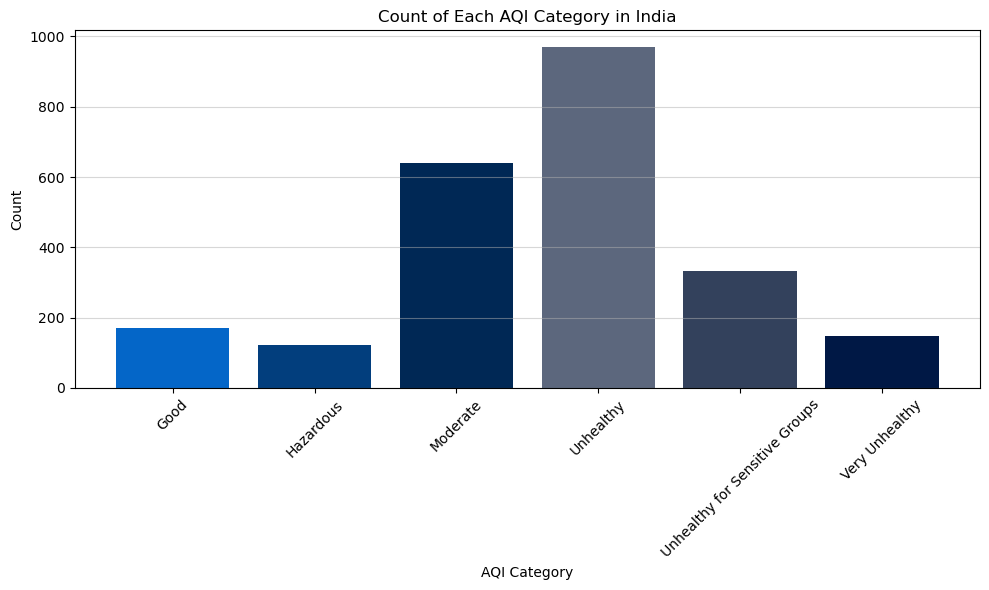

In [26]:
# Query the data with a filter for 'India'
query = """
SELECT aqi_category, COUNT(*) as count
FROM aqi
WHERE country = 'India'
GROUP BY aqi_category
"""
df = pd.read_sql(query, engine)


# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(df['aqi_category'], df['count'], color=['#0466C8', '#023E7D', '#002855', '#5C677D', '#33415C', '#001845'])
plt.xlabel('AQI Category')
plt.ylabel('Count')
plt.title('Count of Each AQI Category in India')
plt.xticks(rotation=45)

# Add horizontal grid lines with custom opacity
plt.grid(True, axis='y', alpha=0.5)

plt.tight_layout()
plt.show()

In [9]:
 # Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

# Print all of the classes mapped to the Base

print(list(Base.classes))

[<class 'sqlalchemy.ext.automap.aqi'>]
